<a href="https://colab.research.google.com/github/luizmouracvo/Hello.flowers/blob/main/Luiz_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 57.1MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.91MB/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.2MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.10MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [8]:
from torch.utils.data import DataLoader

loaders = {
    'train': DataLoader(train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1),

     'test': DataLoader(test_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1)
}

In [9]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x78a2f8d7ea10>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x78a2f8d7d5a0>}

In [17]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):

  def __init__(self):
    super(CNN,self).__init__()

    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training = self.training)
    x = self.fc2(x)

    return F.softmax(x)



In [18]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr = 0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0}%)]\t{loss.item():.6f}')

def test():
  model.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.argmax(dim=1, keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()

      test_loss /= len(loaders['test'].dataset)
      print(f'\nTest set: Average loss: {test_loss: .4f}, Accuracy {correct} / {len(loaders["test"].dataset)} ({100 * correct / len(loaders["test"].dataset): .0f}%\n)')







In [19]:
for epoch in range(1, 11):
  train(epoch)
  test()

<ipython-input-17-d509591563be>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0e+00%)]	2.302768
Train Epoch: 1 [2000/60000 (3e+00%)]	2.278402
Train Epoch: 1 [4000/60000 (7e+00%)]	2.162027
Train Epoch: 1 [6000/60000 (1e+01%)]	2.021887
Train Epoch: 1 [8000/60000 (1e+01%)]	1.875604
Train Epoch: 1 [10000/60000 (2e+01%)]	1.870053
Train Epoch: 1 [12000/60000 (2e+01%)]	1.887830
Train Epoch: 1 [14000/60000 (2e+01%)]	1.736612
Train Epoch: 1 [16000/60000 (3e+01%)]	1.776644
Train Epoch: 1 [18000/60000 (3e+01%)]	1.755600
Train Epoch: 1 [20000/60000 (3e+01%)]	1.712225
Train Epoch: 1 [22000/60000 (4e+01%)]	1.749441
Train Epoch: 1 [24000/60000 (4e+01%)]	1.691478
Train Epoch: 1 [26000/60000 (4e+01%)]	1.726587
Train Epoch: 1 [28000/60000 (5e+01%)]	1.673149
Train Epoch: 1 [30000/60000 (5e+01%)]	1.681239
Train Epoch: 1 [32000/60000 (5e+01%)]	1.690735
Train Epoch: 1 [34000/60000 (6e+01%)]	1.672249
Train Epoch: 1 [36000/60000 (6e+01%)]	1.647411
Train Epoch: 1 [38000/60000 (6e+01%)]	1.709162
Train Epoch: 1 [40000/60000 (7e+01%)]	1.615674
Train Epoch: 1 [42000

KeyboardInterrupt: 

<ipython-input-17-d509591563be>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


prediction: 7


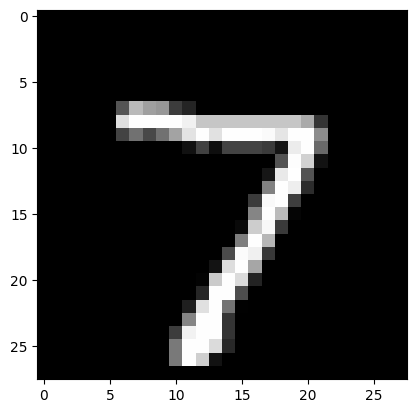

In [20]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[0]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim= True).item()

print(f'prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap= 'gray')
plt.show()

